<a href="https://colab.research.google.com/github/Alessandro-barbosa/Alessandro-barbosa/blob/main/C%C3%A1lculo_N%C3%BAmerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Polinomio: 
            2
0.0001361 x + 0.04086 x + 8.388


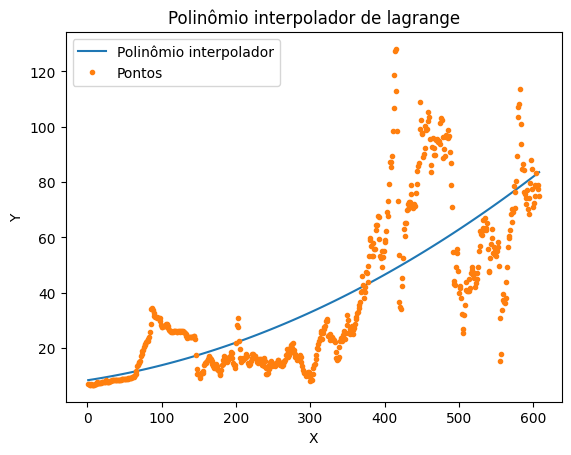

0
0
150
150
60
210
600
1205
-450
-175
-180
213
1572
2155
-925
-660
-370
386
3024
2661
-1180
-1345
-472
797
5076
2458
-1075
-2265
-430
1529
7836
1192
-445
-3465
-178
2681
11436
-1544
920
-4980
368
4364
15984
-6258
3275
-6835
1310
6698
21552
-13527
6910
-9035
2764
9802
28152
-23999
12145
-11560
4858
13789
35724
-38350
19325
-14345
7730
18749
44076
-57278
28785
-17285
11514
24738
52896
-81403
40850
-20195
16340
31748
61632
-111222
55760
-22810
22304
39674
69480
-146967
73630
-24755
29452
48280
75312
-188468
94380
-25520
37752
57153
77604
-234972
117635
-24445
47054
65648
74376
-284928
142610
-20710
57044
72839
63180
-335669
167980
-13315
67192
77440
40992
-383168
191730
-1070
76692
77757
4260
-421638
210965
17375
84386
71618
-51072
-443211
221755
43510
88702
56332
-129480
-437546
218920
78890
87568
28663
-235620
-391501
195900
125045
78360
-15159
-374076
-288947
144620
183315
57848
-79375
-548892
-110575
55435
254670
22174
-168566
-762960
165913
-82805
339410
-33122
-287417
-1017180
56536

<ipython-input-32-75ff9ed30236>:74: RuntimeWarning: overflow encountered in scalar multiply
  s += A[i][j] * x[j]
<ipython-input-32-75ff9ed30236>:74: RuntimeWarning: overflow encountered in scalar add
  s += A[i][j] * x[j]


A saída de streaming foi truncada nas últimas 5000 linhas.
-1331935437065619456
-3250060200978927744
-7672499055653233152
-8243912023978680064
4121956011989340160
-6199637559272891136
1648782404795736064
6298510574250404608
152168604109122560
2403848593151004672
-1201924296575502080
1498543341508039936
-480769718630200832
-1604677224761230592
-4495630024524119040
4330094711662650624
-2165047355831325120
1846645706071752000
-866018942332530048
-2251003221886343808
-5539937118215255040
6840580602159638016
-3420290301079818880
2207217753636041600
-1368116120431927552
-3023529435658958464
-6621653260908123648
-8438985438493401600
4219492719246700800
-6668427765315453696
1687797087698680320
6689117911685270784
1558539222236810240
1661878855386925568
-830939427693462720
893009866802912576
-332375771077385088
-1002133171179569280
-2679029600408736768
2832702841078896384
-1416351420539448000
1088981507409476160
-566540568215779200
-1383276698772886080
-3266944522228427520
4341077321022448384
-

KeyboardInterrupt: 

In [32]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
file_path = '/content/drive/MyDrive/CalculoNumerico/Barril_Valores.xlsx'

df = pd.read_excel(file_path)

coluna_a = []
coluna_b = []

# Pegando os dados da planilha no excel
for row in df.itertuples(index=False):
  if row[0] is not None or row[1] is not None:
    coluna_a.append(row[0])
    coluna_b.append(row[1])
  else:
    break

# transformação em array

x = np.array(coluna_a)
y = np.array(coluna_b)

coef = np.polyfit(x, y, 2)

polinomio = np.poly1d(coef)

print(f"Polinomio: \n {polinomio}")

def lagrange(x, y):
  def L(i):
    def product(j):
      if i == j:
        return 1
      else:
        return (x[i] - x[j]) / (x[i] - x[j])
    return np.prod([product(j) for j in range(len(x))])
  return np.array([L(i) for i in range(len(x))])


# matriz dos pontos de lagrange

# print(lagrange(x, y))

# plotando gráfico

xp = np.linspace(min(x), max(x), 100)

plt.plot(xp, polinomio(xp), label="Polinômio interpolador")

plt.plot(x, y, '.', label="Pontos")

plt.title("Polinômio interpolador de lagrange")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

plt.show()

## Etapa 3

def gauss_seidel(A, b, xO, tol=1e-6, max_iter=10000000):
    n = len(b)
    x = xO.copy()
    for k in range(max_iter):
        for i in range(n):
          s = 0
          for j in range(n):
            if j != i:
              s += A[i][j] * x[j]
              print(s)
          x[i] = (b[i] - s) / A[i][i]
        if abs(max(abs(x - xO))) < tol:
          return x
        xO = x.copy()
    raise ValueError(f"O método de Gauss-Seidel não converge após {max_iter} iterações")

A = [[10, 12, 11], [5, 4, 5], [2, 3, 2]]
b = [300, 350, 320]
xO = [0, 0, 0]

A = np.array(A)
b = np.array(b)
xO = np.array(xO)

solucao = gauss_seidel(A, b, xO)

print("Solução final:")
print(solucao)

# print("Conteúdo da coluna A:", x)
# print("Conteúdo da coluna B:", y)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
